In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from IPython import display

In [2]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create data

In [3]:
def Data(n_samples,m):
    """
    This function creates x and y related by following equation:
    
    y = mx + normal_noise
    
    m : slope
    n_samples : Number of samples to be created
    x : has random normal distribution having size = n_samples
    
    """
    N = n_samples
    x = torch.randn(N,1)

    y = m*x + torch.randn(N,1)/2
    
    return x,y

## 2. Model

In [4]:
def Build_and_train_model(X ,y , learningrate,train_iterations):
    
    """
    This function returns Final Predictions after training and losses in each training iteration
    
    X :  Independent Variable
    y  : Dependent variable
    learningrate : learning rate for each training iteration
    train_iterations :  Number of training iterations
    
    """
    
    # Build the Model
    ANNreg = nn.Sequential(
                       # Neuron -1
                       nn.Linear(in_features= 1,out_features = 1), # Input Layer
                       nn.ReLU(),                                  # Activation Function
                       
                       # Neuron -2
                       nn.Linear(in_features= 1,out_features = 1)  # Output Layer
                
                      )

    # Loss Function - mean squared loss
    lossfunc = nn.MSELoss()

    # Optimizer : SGD -stochastic gradient descent
    optimizer = torch.optim.SGD(params =ANNreg.parameters() , lr = learningrate)
    
    
    epochs = train_iterations
    losses = torch.zeros(epochs)
    
    # Training
    for epoc in range(epochs):

        # Forward Propagation
        y_hat = ANNreg(X)

        # Compute Losses
        loss = lossfunc(y_hat , y)
        losses[epoc] = loss

        # Backpropagation
        optimizer.zero_grad()  # reinitialize
        loss.backward()
        optimizer.step()
        
    # Final Predictions
    predictions = ANNreg(X)
    
    return predictions , losses
             

In [5]:
X ,y = Data(n_samples= 50 ,m = 2)

#### Plotting

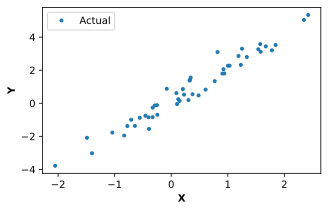

In [6]:
plt.figure(figsize = (5,3) ,dpi = 130)

plt.plot(X ,y ,'.' , label = "Actual")
plt.xlabel("X" , fontweight = "bold")
plt.ylabel("Y", fontweight = "bold")
plt.legend()

plt.show()

## Experiment

In [7]:
# Slopes to simulate
slopes = np.linspace(start = -2 , stop = 2 , num = 21 )

nums_exp = 30

# Initialize 3D output matrix 
results = np.zeros((len(slopes),nums_exp , 2))


for slopei in range(len(slopes)):
    
    for N in range(nums_exp):
        
        # Create a dataset and Run the model
        X,y = Data(n_samples=50 , m = slopes[slopei])
        
        yhat , losses = Build_and_train_model(X = X , y = y , 
                                              learningrate = 0.05 , 
                                              train_iterations = 300 )
        
        corr_coef = np.round(np.corrcoef(yhat.detach().flatten() , y.flatten())[0,1],3)
        
        # Store the Final Loss and Performance
        results[slopei,N,0] = losses[-1]
        results[slopei ,N ,1] = corr_coef
        

# Correlation can be 0 ,if the model didnot do well 
# set nan --> 0

results[np.isnan(results)]  = 0   

# RuntimeWarning : model stuck in local minimum

C:\Users\aakas\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aakas\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [8]:
slope_mean = np.mean(results[:,:,1] , axis = 1)

## Plot the Results

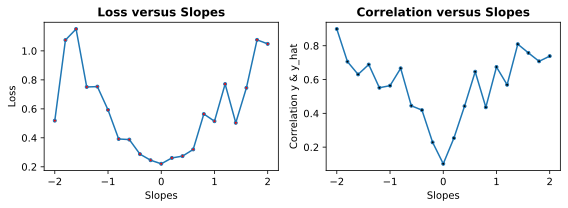

In [9]:
fig,ax = plt.subplots(1,2 , figsize = (8,3))

slope_mean = np.mean(results[:,:,0] , axis = 1)

ax[0].plot(slopes , slope_mean , ".-" ,markerfacecolor = "red")
ax[0].set_xlabel("Slopes")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss versus Slopes" , fontweight  ="bold")

slope_corrcoeff = np.mean(results[:,:,1] , axis = 1)

ax[1].plot(slopes , slope_corrcoeff , ".-" , markerfacecolor = "black")
ax[1].set_xlabel("Slopes")
ax[1].set_ylabel("Correlation y & y_hat")
ax[1].set_title("Correlation versus Slopes" , fontweight = "bold")

fig.tight_layout()

plt.show()